### Example to extract a single NHC best track with additional data

In [216]:
from besttracks.besttracks.io import parse_TCs_NHC_raw # this is the only extraction needed if not doing a plot
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from toolbox.plottingtools import map_formatter
import cartopy
import cartopy.io.shapereader as shpreader

### Not needed: just to make the plot nicer

In [213]:
def map_formatter(ax,tick_base_x=15.0, tick_base_y=15.0, labelsize=20,top_label=False, bottom_label=True, right_label=False,left_label=True,central_longitude=0.0,res='10m'):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='k', linestyle=':')
    gl.top_labels = top_label
    gl.right_labels = right_label
    gl.left_labels = left_label
    gl.bottom_labels = bottom_label
    gl.xlocator = mticker.MultipleLocator(base=tick_base_x)
    gl.ylocator = mticker.MultipleLocator(base=tick_base_y)
    ax.coastlines(resolution=res, color='k', linewidth=1)
    gl.xlabel_style= {'size':labelsize}
    gl.ylabel_style= {'size':labelsize}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

### Extract the TC, Sam in this case 

In [166]:
SAM = parse_TCs_NHC_raw("al",18,2021,"C:/Users/User/Documents/")

100% [................................................................................] 2320 / 2320

### Plot to exemplify

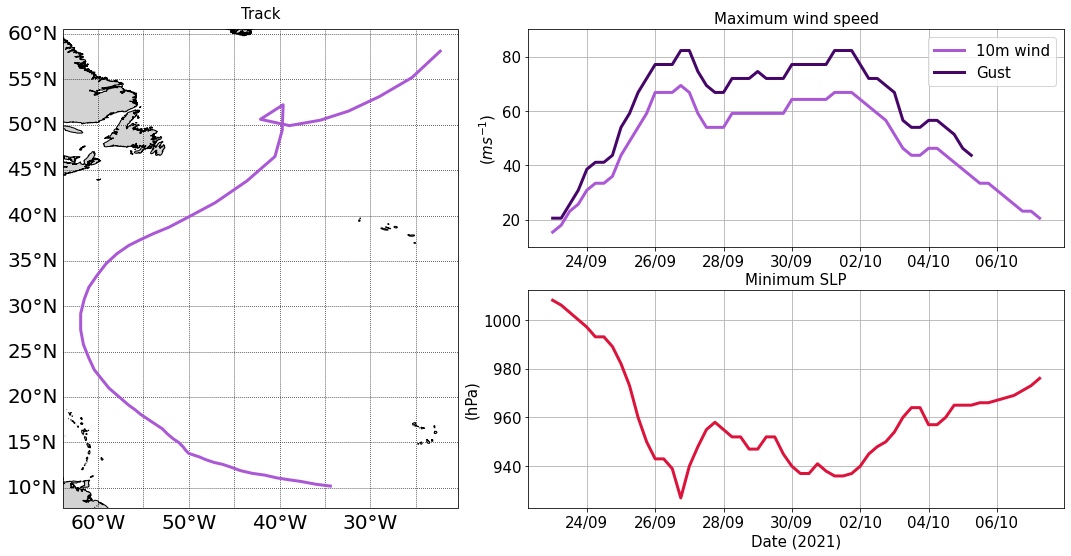

In [214]:
%matplotlib inline
fig = plt.figure()
ax1 = plt.subplot(2,2,2); ax2 = plt.subplot(2,2,4,sharex=ax1) # wspd and mslp plots

# Map
ax3 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree()) # Track map ("ax3")
ax3.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1)
ax3.add_feature(cartopy.feature.LAND,facecolor=("lightgray"))
map_formatter(ax3,tick_base_x=5,tick_base_y=5)
ax3.set_title("Track",fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.plot(SAM['LON'],SAM['LAT'],linewidth=3,color='#aa58d6')

# Max ws axis ("ax1")
ax1.set_ylabel("($ms^{-1}$)",fontsize=15); ax1.set_title("Maximum wind speed",fontsize=15)
ax1.set_xbound(SAM['TIME'][0].to_pydatetime() - timedelta(hours=12),
                   SAM['TIME'].iloc[-1].to_pydatetime() + timedelta(hours=12))
ax1.set_ylim(10,90); ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.plot(SAM['TIME'],SAM['WND'],color='#aa58d6',linewidth=3,label="10m wind")
ax1.plot(SAM['TIME'],SAM['GUST'],color='#460669',linewidth=3,label="Gust")
ax1.legend(fontsize=15)

# MSLP axis ("ax2")
ax2.set_xlabel("Date ("+str(SAM['TIME'][0].year)+")",fontsize=15); ax2.set_ylabel("(hPa)",fontsize=15)
ax2.set_title("Minimum SLP",fontsize=15)
ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(SAM['TIME'],SAM['PRS'],color='crimson',linewidth=3,label="Gust")
ax1.xaxis.set_major_locator(DayLocator(interval=2)); ax1.xaxis.set_major_formatter(DateFormatter('%d/%m'))
#ax3.set_xlim(-80,-68); ax3.set_ylim(18,38)

w, h = fig.get_size_inches()
fig.set_size_inches(w*3.2,h*2.2)
plt.subplots_adjust(wspace=0.00005)